imports and drive connection

In [1]:
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


EXPERIMENTAL CURVE: experimental csv dataset, luminosity normalization, range renstriction, relative position centering and plot

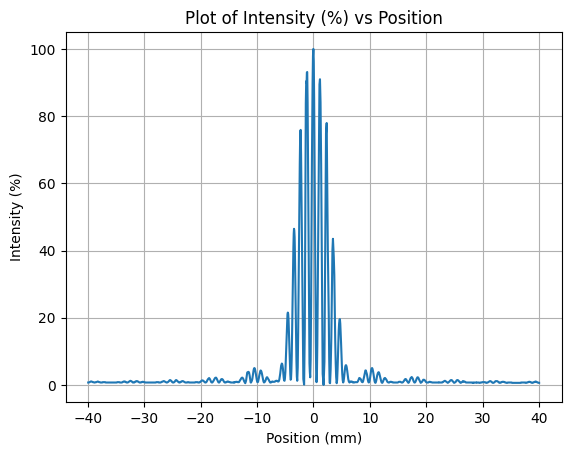

In [9]:
intPath = '/content/drive/MyDrive/colab/interference - interference.csv'
intData = pd.read_csv(intPath, decimal=',')

maximum_x = intData.loc[intData['Light Intensity (%) Run #1'].idxmax(), 'Position (mm) Run #1']

def relx(x, max = maximum_x):
  return x - max

intData['relative positions'] = (relx(intData['Position (mm) Run #1']))

rng = 40

maximum_y = intData['Light Intensity (%) Run #1'].max()
minimum_y = intData['Light Intensity (%) Run #1'].min()

intData['intensities normalized'] = ((intData['Light Intensity (%) Run #1'] - minimum_y) / (maximum_y - minimum_y)) * 100 # normalization

intData = intData[(intData['relative positions'] >= -1 * rng) &
                           (intData['relative positions'] <= rng) &
                           (intData['intensities normalized'] >= 0)]



plt.plot(intData['relative positions'], intData['intensities normalized'])
plt.xlabel('Position (mm)')
plt.ylabel('Intensity (%)')
plt.title('Plot of Intensity (%) vs Position')
plt.grid(True)

plt.show()

In [3]:
maximum_x

75.91

function to calculate teorical intensity

In [4]:
Izero = 1e12
PI = math.pi

def teorical_intensity(y, L, lmb, d, a):    # teorical intensity function
  sintheta = math.sin(math.atan((y * 1e-3) / L))    # y converted to meters OCIO
  I = Izero * (math.cos((PI * d * sintheta) / lmb)**2) * (((math.sin((PI * a * sintheta)/ lmb))/((PI * a * sintheta)/ lmb))**2)
  return I

TEORICAL CURVE: point-wise calculation and dataframe

In [5]:
teorical_curve = []
lamb = 6.5e-7
fend_distance = 0.5e-3
L = 0.9
a = 0.08e-3


for i in np.arange(0, 150, 0.1):
  teorical_curve.append([i, teorical_intensity(relx(i), L, lamb, fend_distance, a)])

column_name = ["position", "intensity"]
teorical_df = pd.DataFrame(teorical_curve, columns=column_name)

normalization and relative position centering

In [6]:
teorical_maximum_y = teorical_df['intensity'].max()
teorical_minimum_y = teorical_df['intensity'].min()

teorical_df['intensities normalized'] = ((teorical_df['intensity'] - teorical_minimum_y) / (teorical_maximum_y - teorical_minimum_y)) * 100
teorical_df['relative positions'] = (relx(teorical_df['position']))

range renstriction and plot

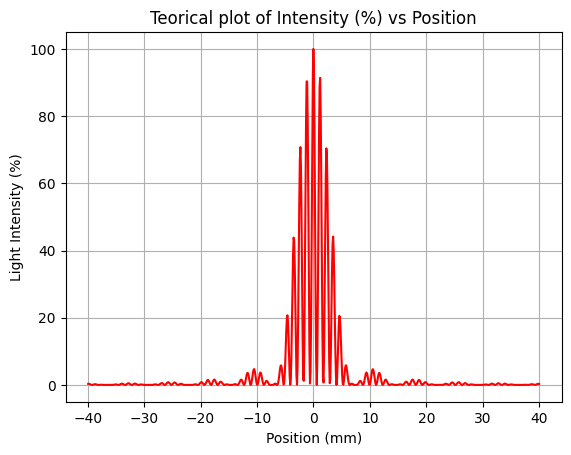

In [10]:
maximum_xt = teorical_df.loc[teorical_df['intensities normalized'].idxmax(), 'relative positions']
rng = 40

teorical_df = teorical_df[(teorical_df['relative positions'] >=  -1 * rng) &
                           (teorical_df['relative positions'] <= rng) &
                           (teorical_df['intensities normalized'] >= 0)]

plt.plot(teorical_df['relative positions'], teorical_df['intensities normalized'], color='red')
plt.xlabel('Position (mm)')
plt.ylabel('Light Intensity (%)')
plt.title('Teorical plot of Intensity (%) vs Position')
plt.grid(True)

plt.show()

COMPARISON BETWEEN EXPERIMENTAL PLOT (BLUE) AND TEORICAL PLOT (RED)

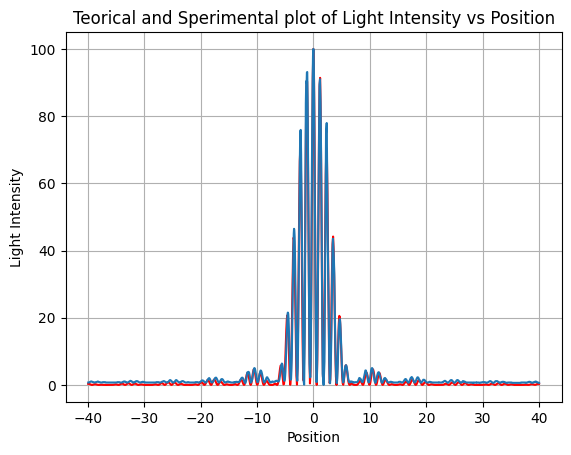

In [8]:
plt.plot(teorical_df['relative positions'], teorical_df['intensities normalized'], color='red')
plt.plot(intData['relative positions'], intData['intensities normalized'])
plt.xlabel('Position')
plt.ylabel('Light Intensity')
plt.title('Teorical and Sperimental plot of Light Intensity vs Position')
plt.grid(True)

plt.show()